In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'  
user_details = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='UserDetails.csv')
user_details.head()


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28.0,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12.0
1,U002,Bob Smith,35.0,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8.0
2,U003,Charlie Lee,42.0,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15.0
3,U004,David Brown,27.0,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10.0
4,U005,Emma White,30.0,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9.0


In [3]:
cooking_sessions = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='CookingSessions.csv')
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15.0,4.7


In [4]:
order_details= pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='OrderDetails.csv')
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001.0,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002.0,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003.0,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004.0,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005.0,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [5]:
# Check for duplicates
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

In [6]:
# Data Cleaning
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [7]:
# Fill or drop missing values as appropriate
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)

# Merge datasets
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='left')
merged_data = pd.merge(merged_data, order_details, on='User ID', how='left')



In [8]:
# Analyze relationships
# Calculate average orders per user
average_orders = merged_data.groupby('User Name')['Total Orders'].mean().reset_index()
average_orders.sort_values(by='Total Orders', ascending=False)

,User Name,Total Orders
2,Charlie Lee,15.0
6,Grace King,14.0
0,Alice Johnson,12.0
3,David Brown,10.0
4,Emma White,9.0
1,Bob Smith,8.0
9,Jack White,8.0
5,Frank Green,7.0
8,Irene Moore,6.0
7,Henry Lee,5.0


In [9]:
# Identify popular dishes
popular_dishes = order_details['Dish Name'].value_counts().reset_index()
popular_dishes.columns = ['Dish Name', 'Total Orders']
print(popular_dishes)

         Dish Name  Total Orders
0        Spaghetti             4
1  Grilled Chicken             4
2     Caesar Salad             3
3         Pancakes             2
4    Veggie Burger             2
5          Oatmeal             1


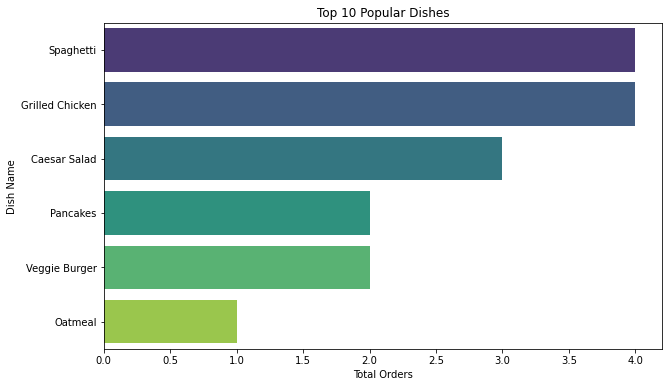

In [10]:
# Visualizations-Popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_dishes.head(10), x='Total Orders', y='Dish Name', palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Total Orders')
plt.ylabel('Dish Name')
plt.show()

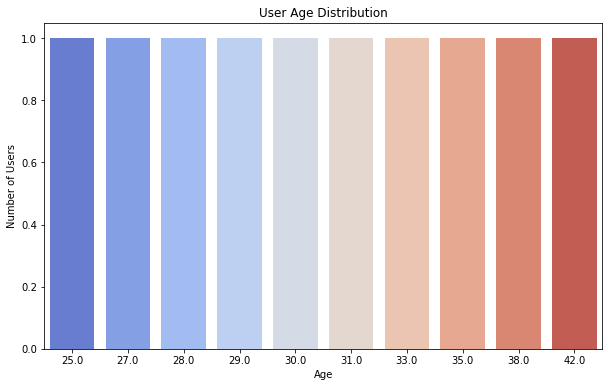

In [11]:
# Analyze demographic factors influencing user behavior
age_distribution = user_details['Age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_distribution, x='Age', y='Count', palette='coolwarm')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


In [12]:
# Summary of findings and recommendations
summary_report = {
    'average_orders': average_orders,
    'popular_dishes': popular_dishes,
}

print("Summary Report:")
print("\nAverage Orders by Age Group:\n",average_orders)
print("\npopular_dishes:\n",popular_dishes)



Summary Report:

Average Orders by Age Group:
        User Name  Total Orders
0  Alice Johnson          12.0
1      Bob Smith           8.0
2    Charlie Lee          15.0
3    David Brown          10.0
4     Emma White           9.0
5    Frank Green           7.0
6     Grace King          14.0
7      Henry Lee           5.0
8    Irene Moore           6.0
9     Jack White           8.0

popular_dishes:
          Dish Name  Total Orders
0        Spaghetti             4
1  Grilled Chicken             4
2     Caesar Salad             3
3         Pancakes             2
4    Veggie Burger             2
5          Oatmeal             1


In [13]:
# Recommendations based on analysis
recommendations = """
1.Concentrate marketing efforts on the top 10 most popular dishes to boost sales.
2.Provide cooking sessions that align with the most favored meal types.
3.Aim promotions at specific demographic groups based on age distribution.
"""
print(recommendations)


1.Concentrate marketing efforts on the top 10 most popular dishes to boost sales.
2.Provide cooking sessions that align with the most favored meal types.
3.Aim promotions at specific demographic groups based on age distribution.

